# Generative AI and Prompt Engineering
## A programme by IISc and TalentSprint
### Assignment 2: Whisper Model

## Learning Objectives

At the end of the experiment, you will be able to:

* perform speech-to-text using whisper model
* perform text-to-speech using tts-1 model
* perform audio to audio translation
* extract text of different speakers from a conversation
* create a gradio interface

## Introduction

**Whisper**

Whisper is a general-purpose speech recognition model. It is trained on a large dataset of diverse audio and is also a multitasking model that can perform multilingual speech recognition, speech translation, and language identification.

**Approach**

A Transformer sequence-to-sequence model is trained on various speech processing tasks, including multilingual speech recognition, speech translation, spoken language identification, and voice activity detection. These tasks are jointly represented as a sequence of tokens to be predicted by the decoder, allowing a single model to replace many stages of a traditional speech-processing pipeline. The multitask training format uses a set of special tokens that serve as task specifiers or classification targets.

<br>

<img src='https://raw.githubusercontent.com/openai/whisper/main/approach.png'>

[[Image Source]](https://github.com/openai/whisper)

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2416549" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9149356263" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M4_AST_02_WhisperModel_B" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://genai-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")

ConnectTimeout: HTTPSConnectionPool(host='dashboard.talentsprint.com', port=443): Max retries exceeded with url: /xp/app/save_notebook_attempts (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7ed489547760>, 'Connection to dashboard.talentsprint.com timed out. (connect timeout=None)'))

### Install Dependencies

In [4]:
%%capture
!pip -q install openai
!pip -q install pyannote.audio==3.1
!pip -q install gradio
!pip -q install -U git+https://github.com/openai/whisper.git

# Install gTTS (Google Text-to-Speech),
# a Python library and CLI tool to interface with Google Translate's text-to-speech API.
!pip -q install gTTS

### Import Required Packages

In [5]:
%%capture
import os
from google.colab import userdata
import matplotlib.pyplot as plt
import torch
import torchaudio
import openai
from openai import OpenAI
import whisper
from IPython.display import Audio
import pyannote.audio
from pyannote.audio import Pipeline
from pyannote.core import Segment
from pyannote.audio.pipelines.utils.hook import ProgressHook
from gtts import gTTS
import gradio as gr

### Load the model

In [6]:
# Load whisper model
model = whisper.load_model("base")

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 102MiB/s]
/usr/local/lib/python3.10/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [7]:
model.device

device(type='cpu')

In [8]:
#@title Download a test audio
from IPython.display import clear_output
!wget -O audio.mp3 http://www.moviesoundclips.net/movies1/darkknightrises/darkness.mp3
clear_output()
!ls | grep '.mp3'

audio.mp3


In [9]:
audio = "audio.mp3"

In [10]:
# Play audio
Audio(audio)

In [11]:
# Load and process the audio file
audio_data = whisper.load_audio(audio)
audio_data = whisper.pad_or_trim(audio_data)

In [12]:
# Make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio_data).to(model.device)

In [13]:
mel.shape

torch.Size([80, 3000])

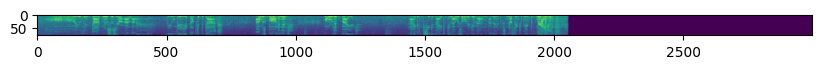

In [14]:
# Visualize spectogram
plt.figure(figsize=(10, 5))
plt.imshow(mel)
plt.show()

In [15]:
# Detect the spoken language
_, probs = model.detect_language(mel)
detected_language = max(probs, key=probs.get)

print(f"Detected language: {detected_language}")

Detected language: en


In [16]:
# This cell will take some time to run on cpu
options = whisper.DecodingOptions(language='en')             # Use the selected language for transcription
result = whisper.decode(model, mel, options)
result.text

"Oh, you think darkness is your ally? You merely adopted the dark. I was born in it, more lived by it. I didn't see the light until I was already a man, but then it was nothing to me but bright!"

### Transcribe

In [17]:
# Creating language mappings
lang_mapping = {'English': 'en',
                'Spanish': 'es',
                'French': 'fr',
                'German': 'gr',
                'Italian': 'it',
                'Japanese': 'ja'}

In [18]:
# Transcribe function to convert speech to text in the selected language
def transcribe(audio, target_language):
    target_language = lang_mapping[target_language]
    if audio is None:
        return "No audio input received.", None
    try:
        # Load and process the audio file
        audio_data = whisper.load_audio(audio)
        audio_data = whisper.pad_or_trim(audio_data)

        # Make log-Mel spectrogram and move to the same device as the model
        mel = whisper.log_mel_spectrogram(audio_data).to(model.device)

        # Detect the spoken language
        _, probs = model.detect_language(mel)
        detected_language = max(probs, key=probs.get)
        # print(f"Detected language: {detected_language}")

        # Decode the audio to text in the selected target language
        options = whisper.DecodingOptions(language=target_language)  # Use the selected language for transcription
        result = whisper.decode(model, mel, options)

        # Convert the transcribed text to speech using gTTS
        tts = gTTS(text=result.text, lang=target_language)
        audio_output_path = "output_audio.mp3"
        tts.save(audio_output_path)

        return f"Detected language: {detected_language}\nTranscription: {result.text}", audio_output_path

    except Exception as e:

        return f"Error during transcription: {str(e)}", None


In [19]:
#@title Download a sample French audio
from IPython.display import clear_output
!wget -O french.mp3 https://www.lightbulblanguages.co.uk/resources/audio/quelageastu.mp3
clear_output()
!ls | grep 'french.mp3'

french.mp3


In [20]:
# Play input audio
Audio('french.mp3')

In [21]:
# Translate
inp_lang, output_file_path = transcribe('french.mp3', target_language='English')
print(inp_lang)

Detected language: fr
Transcription: What did I do? I have 4 I have 5 I have 6 I have 7 I have 8 I have 9 I have 10 I have 11


In [22]:
# Play output audio
Audio(output_file_path)

## Using Whisper model through OpenAI API

### Authenticate your OpenAI API Key

In [25]:
# If you key is stored in Google Colab Secrets, then use this cell

import os
from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OA_API')

In [26]:
# # if your key is in a text file, then UPLOAD your text file containing openapi-key, then run this cell.

# import openai

# f = open('/content/ts_openapi_key.txt')
# api_key = f.read()
# os.environ['OPENAI_API_KEY'] = api_key
# openai.api_key= os.getenv('OPENAI_API_KEY')

### Create OpenAI client object

The Audio API provides two speech to text endpoints, `transcriptions` and `translations`, based on their state-of-the-art open source large-v2 [Whisper model](https://openai.com/index/whisper/).

They can be used to:

* Transcribe audio into whatever language the audio is in.
* Translate and transcribe the audio into english.

File uploads are currently limited to 25 MB and the following input file types are supported: `mp3, mp4, mpeg, mpga, m4a, wav,` and `webm`.

In [27]:
from openai import OpenAI

# Create OpenAI client object
client = OpenAI()

# Transcribe : Speech-to-Text

**Transcriptions**

In [28]:
from IPython.display import Audio

# Play sample audio
Audio("audio.mp3")

In [29]:
# Read audio file
audio_file = open("audio.mp3", "rb")

In [30]:
# Transcribe

transcription = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)
transcription

Transcription(text="Oh, you think darkness is your ally. You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man. By then it was nothing to me but blight.")

In [31]:
transcription.text

"Oh, you think darkness is your ally. You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man. By then it was nothing to me but blight."

In [32]:
# To return transcribed text directly

transcription_text = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file,
  response_format="text"
)

transcription_text

"Oh, you think darkness is your ally. You merely adopted the dark. I was born in it. Molded by it. I didn't see the light until I was already a man. By then it was nothing to me but blight.\n"

# Translate

In [33]:
#@title Download a sample French audio
from IPython.display import clear_output
!wget -O french.mp3 https://www.lightbulblanguages.co.uk/resources/audio/quelageastu.mp3
clear_output()
!ls | grep 'french.mp3'

french.mp3


**Translations**

In [34]:
# Play audio
Audio("french.mp3")

In [35]:
# Read audio file
audio_file = open("french.mp3", "rb")

In [36]:
# Translate to English

translation = client.audio.translations.create(
  model="whisper-1",
  file=audio_file,
  prompt = 'Translate to english'
)

translation.text

'How old are you? I am four years old. I am five years old. I am six years old. I am seven years old. I am eight years old. I am nine years old. I am ten years old. I am eleven years old.'

# Text-to-Speech

The Audio API provides a `speech` endpoint based on the [TTS (text-to-speech) model](https://platform.openai.com/docs/models/tts).

It comes with 6 built-in voices and can be used to:

* Narrate a written blog post
* Produce spoken audio in multiple languages
* Give real time audio output using streaming

In [37]:
# Text to convert into speech
input_text = "Today is a wonderful day to build something people love!"

# File path to save the generated speech
save_speech_file_path = "speech.mp3"

# Text-to-Speech
response = client.audio.speech.create(
  model="tts-1",
  voice="alloy",
  input=input_text
)

# Save response in file
response.write_to_file(save_speech_file_path)

In [38]:
# Play generated audio
Audio(save_speech_file_path)

# Any-Audio to English-Audio Translation

In [39]:
# Function to convert input from non-english language to English language

def convert_to_eng_audio(input_file_path, save_path = "generated_audio.mp3"):

    # Read audio
    audio_file = open(input_file_path, "rb")

    # Translate
    translation = client.audio.translations.create(
        model="whisper-1",
        file=audio_file,
        prompt = 'Translate to english'
        )
    input_text = translation.text

    # Text-to-Speech
    response = client.audio.speech.create(
        model="tts-1",
        voice="alloy",
        input=input_text
        )

    # Save response in file
    response.write_to_file(save_path)
    print("Response saved in:  " +  save_path)

    return Audio(save_path)


In [40]:
#@title Capture audio from user (Re-run this cell to capture another audio)
import os
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import IPython.display as ipd
from IPython.display import Audio

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

if not os.path.exists('MyAudios/'):
    os.mkdir("MyAudios")
def record(sec=10):
    print("Start speaking! (10 sec left)")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('MyAudios/audio_'+current_time+'.mp3','wb') as f:
        f.write(b)
    print('input_file_path = MyAudios/audio_'+current_time+'.mp3')
    return 'MyAudios/audio_'+current_time+'.mp3'

input_file_path = record()

Audio(input_file_path)

Start speaking! (10 sec left)


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
# Convert to English
convert_to_eng_audio(input_file_path)

# Extract text of different speakers from a conversation

**Speaker diarization** is a process of separating individual speakers in an audio stream so that, in the automatic speech recognition (ASR) transcript, each speaker's utterances are separated. Each speaker is separated by their unique audio characteristics and their utterances are bucketed together.

>**Example without speaker diarization:**
>
>*Hello, and thank you for calling premier phone service. Please be aware that this call may be recorded for quality and training purposes. My name is Beth, and I will be assisting you today. How are you doing? Not too bad. How are you today? I'm doing well. Thank you. May I please have your name? My name is Blake.*

>**With speaker diarization:**
>
>[Speaker:0] *Hello, and thank you for calling premier phone service. Please be aware that this call may be recorded for quality and training purposes.*
>
>[Speaker:0] *My name is Beth, and I will be assisting you today. How are you doing?*
>
>[Speaker:1] *Not too bad. How are you today?*
>
>[Speaker:0] *I'm doing well. Thank you. May I please have your name?*
>
>[Speaker:1] *My name is Blake.*


Here, we will be using `pyannote/speaker-diarization-3.1` pipeline to extract different speakers from a conversation audio.

Pre-requisite steps to use this pipeline are:

1. Install pyannote.audio 3.1 with `pip install pyannote.audio==3.1`. This is installed at the start.
2. Visit https://huggingface.co/pyannote/segmentation-3.0 and accept user conditions
3. Visit https://huggingface.co/pyannote/speaker-diarization-3.1 and accept user conditions
4. Visit https://huggingface.co/settings/tokens to create an access token
5. Instantiate pretrained speaker diarization pipeline

In [ ]:
#@title Download a sample Conversation audio
from IPython.display import clear_output
!wget -O conversation.mp3 https://www.moviesoundclips.net/movies1/overthehedge/chip.mp3
clear_output()
!ls | grep 'conversation.mp3'

In [ ]:
# Play audio
Audio("conversation.mp3")

In [ ]:
# Get conversation text

# Read audio file
file_name = "conversation.mp3"
audio_file = open(file_name, "rb")

# Transcribe conversation
result = client.audio.transcriptions.create(
  model="whisper-1",
  file=audio_file
)

conversation_text = result.text
conversation_text

In [41]:
from pyannote.audio import Pipeline

In [46]:
# Save your HF token in Colab Secrets then run this cell
os.environ['HF_TOKEN'] = userdata.get('HF_TOKEN')

In [48]:
# Load Pyannote for speaker diarization
diarization_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1", use_auth_token=os.environ['HF_TOKEN'])



Could not download 'pyannote/segmentation' model.
It might be because the model is private or gated so make
sure to authenticate. Visit https://hf.co/settings/tokens to
create your access token and retry with:

   >>> Model.from_pretrained('pyannote/segmentation',
   ...                       use_auth_token=YOUR_AUTH_TOKEN)

If this still does not work, it might be because the model is gated:
visit https://hf.co/pyannote/segmentation to accept the user conditions.


AttributeError: 'NoneType' object has no attribute 'eval'

In [ ]:
# Run Diarization pipeline over the conversation audio

# Hooks are available to monitor the progress of the pipeline
from pyannote.audio.pipelines.utils.hook import ProgressHook

with ProgressHook() as hook:
    diarization = diarization_pipeline('conversation.mp3', num_speakers=2, hook=hook)


In [ ]:
# Visualize
diarization

In [ ]:
# Get timeframes for all speakers

speakers = []
speakers_start = []
speakers_stop = []

for turn, track, speaker in diarization.itertracks(yield_label=True):
    speakers.append(speaker)
    speakers_start.append(turn.start)
    speakers_stop.append(turn.end)
    print(f"{speaker} : Start={turn.start:.1f}s Stop={turn.end:.1f}s")


In [ ]:
# Get text for all speakers
speakers_text = []

py_audio = pyannote.audio.Audio(mono="downmix")

for i in range(len(speakers)):
    segment = Segment(speakers_start[i], speakers_stop[i])
    waveform, sr = py_audio.crop("conversation.mp3", segment)
    torchaudio.save("speaker"+str(i)+".mp3", waveform, sr)
    audio_file = open("speaker"+str(i)+".mp3", "rb")
    # Transcribe
    speaker_test = client.audio.translations.create(
        model="whisper-1",
        file=audio_file,
        )
    speakers_text.append(speaker_test.text)


In [ ]:
# Results of diarization

print(f"{'Speaker':<12} {'Start(sec)':<12} {'Stop(sec)':<12} {'Text'}")
print('='*60)

for i in range(len(speakers)):
    print(f"{speakers[i]:<12} {round(speakers_start[i],2):<12} {round(speakers_stop[i],2):<12} {speakers_text[i]}")


# Gradio Interface for Audio to Audio Translation

In [ ]:
import gradio as gr

In [ ]:
# Create a gradio interface

# Input elements
audio_input = gr.Audio(type="filepath", label="Record or Upload Audio for Transcription")
target_lang = gr.Dropdown(choices=["English", "Spanish", "French", "German", "Italian", "Japanese"], label="Target Language")

# Output elements
transcription_output = gr.Textbox(label="Transcription Output")
audio_output = gr.Audio(label="Translated Speech Output")

demo = gr.Interface(
    fn=transcribe,
    inputs=[audio_input, target_lang],
    outputs=[transcription_output, audio_output],
    title="Whisper Audio Transcription and Translation",
    allow_flagging='never',
)

In [ ]:
# Launch interface
demo.launch(debug=True, share=True)

### Please answer the questions below to complete the experiment:




In [49]:
#@title What is one of the key features of Whisper that distinguishes it from traditional speech recognition models? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "It is trained on multilingual and multitask data" #@param ["", "It can generate realistic images", "It is trained on multilingual and multitask data", "It can perform live video translation", "It only works on cloud-based platforms"]

In [50]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [51]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "." #@param {type:"string"}


In [52]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [53]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [54]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [55]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please complete the setup first.
